## Machine Sound Prediction Model
This notebook trains a resnet model to predict whether input
machine sounds are normal or abnormal.

TODO:
1. Train a normal resnet, figure out what kinds of augmentation work for this problem
2. Possibly try the densenet arch, with less data

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from pathlib import Path

In [3]:
bs = 32
path = Path('./data/spectrograms')
path

PosixPath('data/spectrograms')

Spectrogram Image Augmentation Rules:
- Experiment with random rotations and stuff? Are we just trying to learn the actual shape, not anything else?

In [5]:
get_transforms?

In [12]:
tfms = get_transforms(do_flip=False, flip_vert=False, max_rotate=0, max_zoom=1.0, max_lighting=0.3, max_warp=0,
                      p_affine=1., p_lighting=1.)

### Need to make images square, or find out how to deal with non square

In [13]:
# need to grab the image size
# check out imagenet_stats normalization
size = 462
data = ImageDataBunch.from_folder(path, train="/train", valid_pct=0.2,
                                  ds_tfms=tfms, size=size, bs=bs).normalize(imagenet_stats)

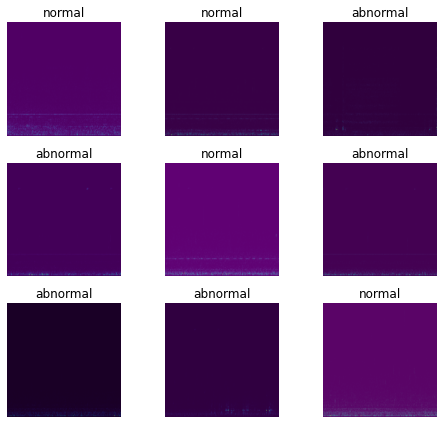

In [14]:
data.show_batch(rows=3,figsize=(7,6))

In [23]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Need to assign the model folder to the learner, as seen in Skin Cancer model

Do i need to freeze the model before the first set of training?

In [24]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


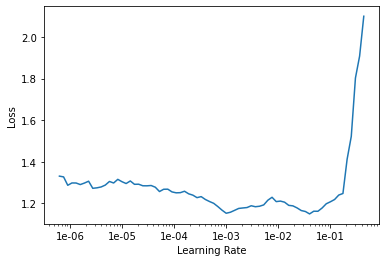

In [25]:
learn.lr_find()
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(8, 1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,1.267904,0.800255,0.355556,00:10
1,1.137743,0.554648,0.222222,00:10
2,0.954607,0.429189,0.200000,00:10
3,0.839473,0.453670,0.148148,00:10
4,0.705489,0.307778,0.125926,00:10
5,0.592282,0.305334,0.103704,00:10
6,0.502342,0.290037,0.096296,00:10
7,0.424913,0.291078,0.103704,00:10


In [18]:
learn.save()

AttributeError: 'NoneType' object has no attribute 'flush'

In [19]:
learn.save?

In [27]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


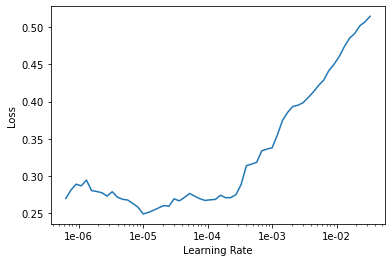

In [28]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(4, slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.271444,0.289160,0.111111,00:13
1,0.260729,0.255608,0.074074,00:13
2,0.234848,0.241408,0.125926,00:13


In [ ]:
learn.save()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))